<!-- WARNING: THIS FILE WAS AUTOGENERATED! DO NOT EDIT! -->

In [1]:
#| echo: false
#| output: asis
show_doc(fmter)

---

[source](https://github.com/alexlewzey/imgtk/blob/main/imgtk/imgtk.py#L25){target="_blank" style="float:right; font-size:smaller"}

### fmter

>      fmter (src:Union[str,pathlib.Path], fmt:str='png')

Convert image format

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| src | Union |  | source image path # fmt: skip |
| fmt | str | png | target image format # fmt: skip |
| **Returns** | **None** |  |  |

Test file is created by [`fmter`](https://alexlewzey.github.io/imgtk/imgtk.html#fmter)

In [ ]:
dir_img = Path("images").absolute()
if (dir_img / "mole.png").exists():
    (dir_img / "mole.png").unlink()
fmter(dir_img / "mole.jpg", "png")
test_eq((dir_img / "mole.png").exists(), True)

Test saved image has the same size as the original one

In [ ]:
test_eq(imread(dir_img / "mole.jpg").shape, imread(dir_img / "mole.png").shape)

In [2]:
#| echo: false
#| output: asis
show_doc(recolor)

---

[source](https://github.com/alexlewzey/imgtk/blob/main/imgtk/imgtk.py#L34){target="_blank" style="float:right; font-size:smaller"}

### recolor

>      recolor (src:str, trg:str, color:tuple[int,int,int])

Recolor image except pixels with alpha=0

|    | **Type** | **Details** |
| -- | -------- | ----------- |
| src | str | source image path |
| trg | str | target image path |
| color | tuple | color to recolor to |
| **Returns** | **None** |  |

[`recolor`](https://alexlewzey.github.io/imgtk/imgtk.html#recolor) sets color of non-blank image pixels to a single rgb value.

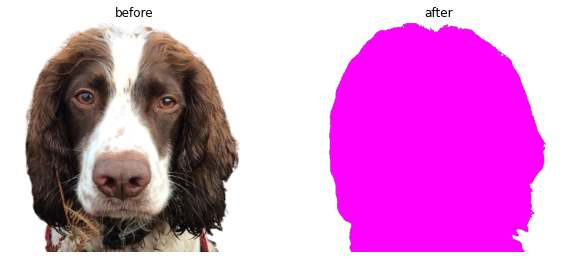

In [ ]:
recolor(dir_img / "mole-no-background.png", dir_img / "mole-pink.png", (255, 0, 255))

imgs = [Image.open(dir_img / f) for f in ["mole-no-background.png", "mole-pink.png"]]
_, axs = plt.subplots(1, 2, figsize=(10, 18))
axs = axs.flatten()
for img, ax, title in zip(imgs, axs, ["before", "after"]):
    ax.imshow(img)
    ax.axis("off")
    ax.set_title(title)
plt.show()

Test file is created by [`recolor`](https://alexlewzey.github.io/imgtk/imgtk.html#recolor)

In [ ]:
rgb = (0, 0, 255)
blue_png = dir_img / "mole-blue.png"
if blue_png.exists():
    blue_png.unlink()
recolor(dir_img / "mole-no-background.png", blue_png, rgb)
test_eq(blue_png.exists(), True)

Test `rgb` is equal to the most common pixel color in the target image.

In [ ]:
img = Image.open(blue_png)
pixels = [img.getpixel((i, j)) for i, j in product(*map(range, img.size))]
pixel = pd.Series(pixels).value_counts().index[0][:3]
test_eq(pixel, (0, 0, 255))

In [3]:
#| echo: false
#| output: asis
show_doc(pixel_color)

---

[source](https://github.com/alexlewzey/imgtk/blob/main/imgtk/imgtk.py#L65){target="_blank" style="float:right; font-size:smaller"}

### pixel_color

>      pixel_color (fmt:str='rgb')

Add the color of current mouse cursor position to the clipboard.

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| fmt | str | rgb | format of retured color (rgb or hex) # fmt: skip |
| **Returns** | **None** |  |  |

`pixel_color()` will copy the color of the current mouse cursor position to the clipboard. 

In [ ]:
# pixel_color()
# pyperclip.paste()

'(24, 24, 24)'

The color can be returned in either rgb or hex format.

In [ ]:
# pixel_color('hex')
# pyperclip.paste()

'#181818'

In [ ]:
test_eq(rgb2hex(*(24, 24, 24)), "#181818")
# test_fail(lambda: pixel_color('wav'))

In [4]:
#| echo: false
#| output: asis
show_doc(main)

---

[source](https://github.com/alexlewzey/imgtk/blob/main/imgtk/imgtk.py#L76){target="_blank" style="float:right; font-size:smaller"}

### main

>      main ()